In [1]:
import pandas as pd
import alphalens as al
import numpy as np
from datetime import datetime
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%run get_data.ipynb

## Alpha006: (-1 * correlation(open, volume, 10))

## 1.整理原始数据

In [4]:
price_data=(kline_data[['asset', 'open_price', 'date']].pivot_table(values='open_price', index='date', columns='asset')/10000).sort_index()
volume_data=(kline_data[['asset', 'volume', 'date']].pivot_table(values='volume', index='date', columns='asset')).sort_index()

In [5]:
price_data.head()

asset,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,873122.BJ,873132.BJ,873152.BJ,873167.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ,873576.BJ
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,19.10,28.40,20.69,2.53,5.64,6.27,2.54,7.52,4.15,12.20,...,NaN,NaN,3.25,NaN,4.0,NaN,NaN,60.0,10.98,NaN
2021-01-05,18.40,27.78,21.02,2.52,5.50,5.64,2.52,7.80,4.06,11.92,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-06,18.08,27.80,20.73,2.47,5.42,5.30,2.54,7.77,4.07,11.91,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-07,19.52,29.00,20.00,2.40,5.37,4.57,2.67,7.70,4.08,12.00,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-08,19.90,28.98,19.05,2.36,5.21,4.11,2.57,7.48,3.97,10.91,...,NaN,NaN,3.25,NaN,4.0,NaN,6.66,60.0,10.98,NaN


In [6]:
volume_data.head()

asset,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,873122.BJ,873132.BJ,873152.BJ,873167.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ,873576.BJ
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,155421643.0,146844133.0,2739801.0,4896339.0,8132668.0,850900.0,13795696.0,81454236.0,18829709.0,7027182.0,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN
2021-01-05,182135210.0,116265838.0,2304905.0,10317710.0,8532533.0,71435766.0,33215803.0,57578742.0,9823110.0,6146690.0,...,NaN,NaN,0.0,NaN,0.0,NaN,10000.0,0.0,0.0,NaN
2021-01-06,193494512.0,104880129.0,3183310.0,14822400.0,7183377.0,23693705.0,58454361.0,54967260.0,11326500.0,6987253.0,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN
2021-01-07,158418530.0,122675574.0,4119880.0,9987378.0,10809106.0,6509500.0,34215256.0,82901381.0,9650301.0,13653804.0,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN
2021-01-08,119547322.0,102856329.0,3841505.0,6593996.0,9108084.0,3607400.0,19792300.0,57526129.0,8790300.0,9798260.0,...,NaN,NaN,0.0,NaN,0.0,NaN,3101.0,0.0,0.0,NaN


## 2.定义函数

In [7]:
def correlation(x,y,window=10):
    return x.rolling(window).corr(y)

## 3.计算因子

In [8]:
factor_data=-1*correlation(price_data,volume_data,10)
factor_data=factor_data.replace([-np.inf,np.inf],0).fillna(value=0)

In [9]:
factor_data=factor_data.stack()
factor_data

date        asset    
2021-01-04  000001.SZ    0.000000
            000002.SZ    0.000000
            000004.SZ    0.000000
            000005.SZ    0.000000
            000006.SZ    0.000000
                           ...   
2021-12-31  873223.BJ    0.000000
            873305.BJ    0.720985
            873339.BJ    0.495803
            873527.BJ    0.143602
            873576.BJ   -0.151495
Length: 1175877, dtype: float64

In [10]:
factor_data = factor_data.reset_index()
factor_data.rename(columns={0:'factor'}, inplace=True)
factor_data.head()

,date,asset,factor
0,2021-01-04,000001.SZ,0.0
1,2021-01-04,000002.SZ,0.0
2,2021-01-04,000004.SZ,0.0
3,2021-01-04,000005.SZ,0.0
4,2021-01-04,000006.SZ,0.0


## 4.合并数据

In [11]:
kline_data = kline_data.merge(share_data, on=['asset', 'date'])
kline_data['tcap'] = kline_data['close_price'] * kline_data['circulation_a']/10000
factor_data = factor_data.merge(kline_data[['asset', 'date', 'tcap', 'open_price', 'high_price', 'low_price', 'close_price', 'volume']], on=['asset', 'date'])
factor_data.head()
factor_data.shape[0]

1060558

In [12]:
factor_data = factor_data.merge(indus_data[['asset', 'date', 'first_industry_code']], on=['asset', 'date'])
factor_data=factor_data.merge(st_data[['asset','date','st']],on=['asset','date'])

## 5.剔除ST股票

In [13]:
factor_data = factor_data[factor_data['st'] != 1]
factor_data.head()

,date,asset,factor,tcap,open_price,high_price,low_price,close_price,volume,first_industry_code,st
0,2021-01-04,000001.SZ,0.0,3.609470e+11,191000.0,191000.0,184400.0,186000.0,155421643.0,40,0
1,2021-01-04,000002.SZ,0.0,2.698637e+11,284000.0,284000.0,275200.0,277800.0,146844133.0,42,0
2,2021-01-04,000004.SZ,0.0,1.763971e+09,206900.0,211900.0,205200.0,210200.0,2739801.0,35,0
3,2021-01-04,000005.SZ,0.0,2.666025e+09,25300.0,25300.0,25100.0,25200.0,4896339.0,20,0
4,2021-01-04,000006.SZ,0.0,7.442660e+09,56400.0,56400.0,55000.0,55200.0,8132668.0,42,0


## 6.剔除上市不满一年的股票

逻辑：按股票分组，获取每只股票的最早交易时间和最晚交易时间，相减得到交易总时间，不超过一年（这里设置为300天，时间更宽松一些）的剔除。

In [14]:
first_trade_dates = factor_data.groupby('asset')['date'].min()
last_trade_date = factor_data['date'].max()

trading_days = (last_trade_date - first_trade_dates).dt.days
stocks_less_than_a_year = trading_days[trading_days < 300].index

factor_data = factor_data[~factor_data['asset'].isin(stocks_less_than_a_year)]

factor_data.head()

,date,asset,factor,tcap,open_price,high_price,low_price,close_price,volume,first_industry_code,st
0,2021-01-04,000001.SZ,0.0,3.609470e+11,191000.0,191000.0,184400.0,186000.0,155421643.0,40,0
1,2021-01-04,000002.SZ,0.0,2.698637e+11,284000.0,284000.0,275200.0,277800.0,146844133.0,42,0
2,2021-01-04,000004.SZ,0.0,1.763971e+09,206900.0,211900.0,205200.0,210200.0,2739801.0,35,0
3,2021-01-04,000005.SZ,0.0,2.666025e+09,25300.0,25300.0,25100.0,25200.0,4896339.0,20,0
4,2021-01-04,000006.SZ,0.0,7.442660e+09,56400.0,56400.0,55000.0,55200.0,8132668.0,42,0


## 7.剔除停牌股票和一字涨跌停股票

逻辑：找到开高低收相等并且交易量为0的条件以及高开低收相等的条件，过滤。

In [15]:
def filter_stocks(row):
    # 停牌股票
    halted_stock = (row['open_price'] == row['high_price'] == row['low_price'] == row['close_price']) and (row['volume'] == 0)
    # 一字涨跌停股票
    limit_up_down_stock = row['open_price'] == row['high_price'] == row['low_price'] == row['close_price']
    return halted_stock or limit_up_down_stock


factor_data = factor_data[~factor_data.apply(filter_stocks, axis=1)]

columns_to_drop = ['open_price', 'high_price', 'low_price', 'close_price', 'volume']
factor_data = factor_data.drop(columns=columns_to_drop)

factor_data.head()

,date,asset,factor,tcap,first_industry_code,st
0,2021-01-04,000001.SZ,0.0,3.609470e+11,40,0
1,2021-01-04,000002.SZ,0.0,2.698637e+11,42,0
2,2021-01-04,000004.SZ,0.0,1.763971e+09,35,0
3,2021-01-04,000005.SZ,0.0,2.666025e+09,20,0
4,2021-01-04,000006.SZ,0.0,7.442660e+09,42,0


## 8.缺失值处理

逻辑：金融数据信噪比很低，实务操作中一般会丢弃空值，所以只要有缺失值就剔除

In [16]:
factor_data = factor_data.dropna()
factor_data.shape[0]

948956

## 9.去极值，标准化，中性化

逻辑：在pre-process.ipynb文件里

In [17]:
%run pre-process.ipynb

In [18]:
factor_data = adjust2(factor_data.copy())

In [17]:
factor_data.head()

,date,asset,factor,tcap,first_industry_code,st
0,2021-01-04,000001.SZ,0.0,3.609470e+11,40,0
1,2021-01-04,000002.SZ,0.0,2.698637e+11,42,0
2,2021-01-04,000004.SZ,0.0,1.763971e+09,35,0
3,2021-01-04,000005.SZ,0.0,2.666025e+09,20,0
4,2021-01-04,000006.SZ,0.0,7.442660e+09,42,0


In [18]:
factor_data = factor_data.set_index(['date', 'asset'])['factor']
factor_data

date        asset    
2021-01-04  000001.SZ    0.000000
            000002.SZ    0.000000
            000004.SZ    0.000000
            000005.SZ    0.000000
            000006.SZ    0.000000
                           ...   
2021-12-31  688699.SH    0.031582
            688777.SH    0.576181
            688788.SH   -0.178441
            688819.SH   -0.820477
            688981.SH   -0.554811
Name: factor, Length: 948956, dtype: float64

## 10.整理数据

In [19]:
factor_data = al.utils.get_clean_factor_and_forward_returns(
                                              factor_data,
                                              price_data,
                                              groupby=None,
                                              binning_by_group=False,
                                              quantiles=5,
                                              bins=None,
                                              periods=(1, 5, 10),
                                              filter_zscore=20,
                                              groupby_labels=None,
                                              max_loss=0.35,
                                              zero_aware=False)

Dropped 7.8% entries from factor data: 4.1% in forward returns computation and 3.7% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [20]:
factor_data

1D        5D       10D    factor  factor_quantile
date       asset                                                             
2021-01-15 000001.SZ  0.009524  0.058571  0.086190  0.257015              5.0
           000002.SZ  0.006331 -0.001999 -0.048650  0.193242              5.0
           000004.SZ  0.041433  0.125980  0.058791 -0.021150              4.0
           000005.SZ  0.022727  0.050000 -0.004545 -0.296796              3.0
           000006.SZ -0.003795  0.011385 -0.041746  0.343145              5.0
...                        ...       ...       ...       ...              ...
2021-12-17 688699.SH -0.019331 -0.097501 -0.123149 -0.020629              4.0
           688777.SH -0.069559 -0.065067 -0.037474  0.617193              5.0
           688788.SH -0.041505 -0.066393 -0.029061 -0.106033              4.0
           688819.SH -0.009877 -0.035017 -0.046016 -0.763133              1.0
           688981.SH -0.004303 -0.010290 -0.010290 -0.111218              4.0

[875179 rows x 5 columns]

## 11.获取IC序列

In [21]:
from alphalens import performance as perf
ic = perf.factor_information_coefficient(factor_data)
ic.head()

,1D,5D,10D
date,,,
2021-01-15,0.012183,0.032970,0.070375
2021-01-18,-0.006398,0.010255,0.086714
2021-01-19,0.017825,-0.006116,0.065893
2021-01-20,-0.064081,0.004515,0.071995
2021-01-21,-0.096587,0.015318,0.035033


## 12.IC分析

Information Analysis


,1D,5D,10D
IC Mean,-0.025,-0.001,0.006
IC Std.,0.063,0.061,0.058
Risk-Adjusted IC,-0.403,-0.014,0.110
t-stat(IC),-6.028,-0.205,1.651
p-value(IC),0.000,0.838,0.100
IC Skew,-0.223,-0.013,-0.185
IC Kurtosis,-0.269,-0.136,0.124


<Figure size 640x480 with 0 Axes>

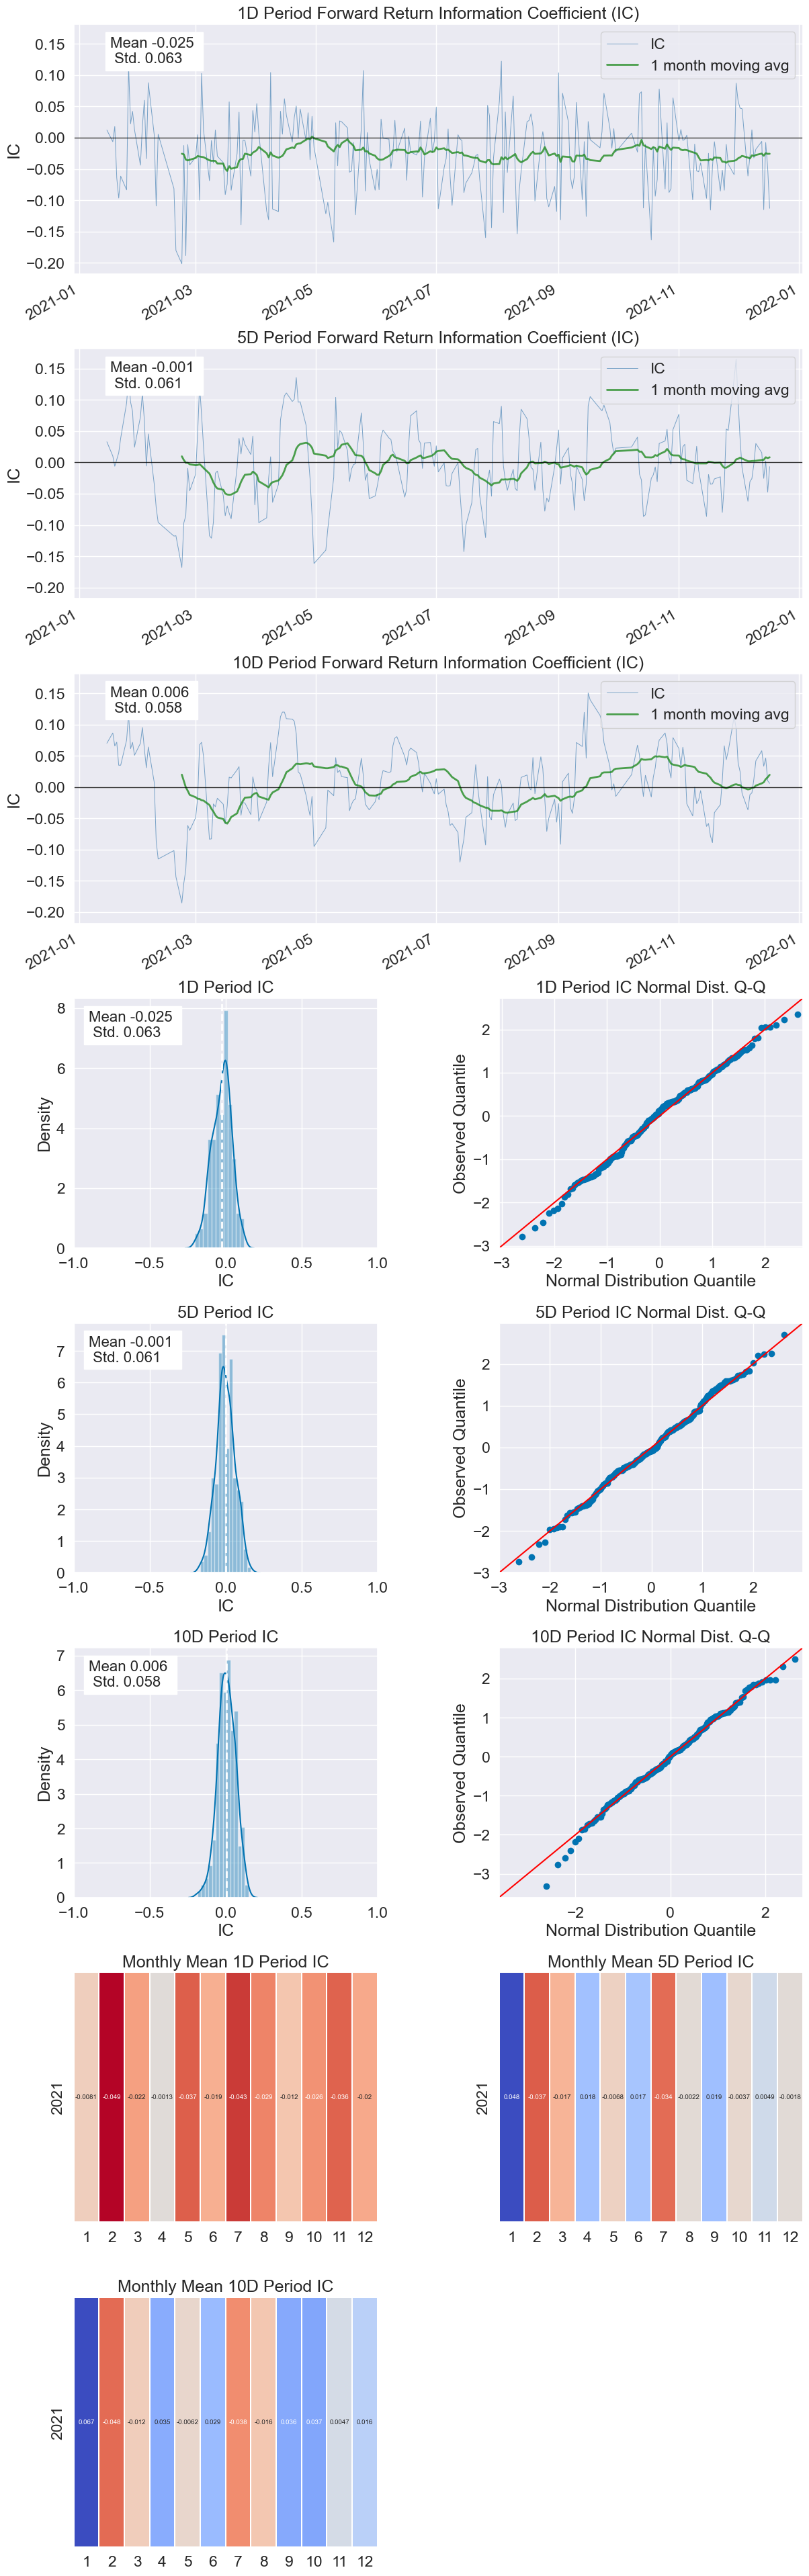

In [22]:
al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

## 13.收益率分析

Returns Analysis


,1D,5D,10D
Ann. alpha,-0.138,-0.024,0.004
beta,-0.631,-0.641,-0.629
Mean Period Wise Return Top Quantile (bps),2.890,7.623,8.488
Mean Period Wise Return Bottom Quantile (bps),16.293,9.942,9.595
Mean Period Wise Spread (bps),-13.403,-2.215,-0.951


<Figure size 640x480 with 0 Axes>

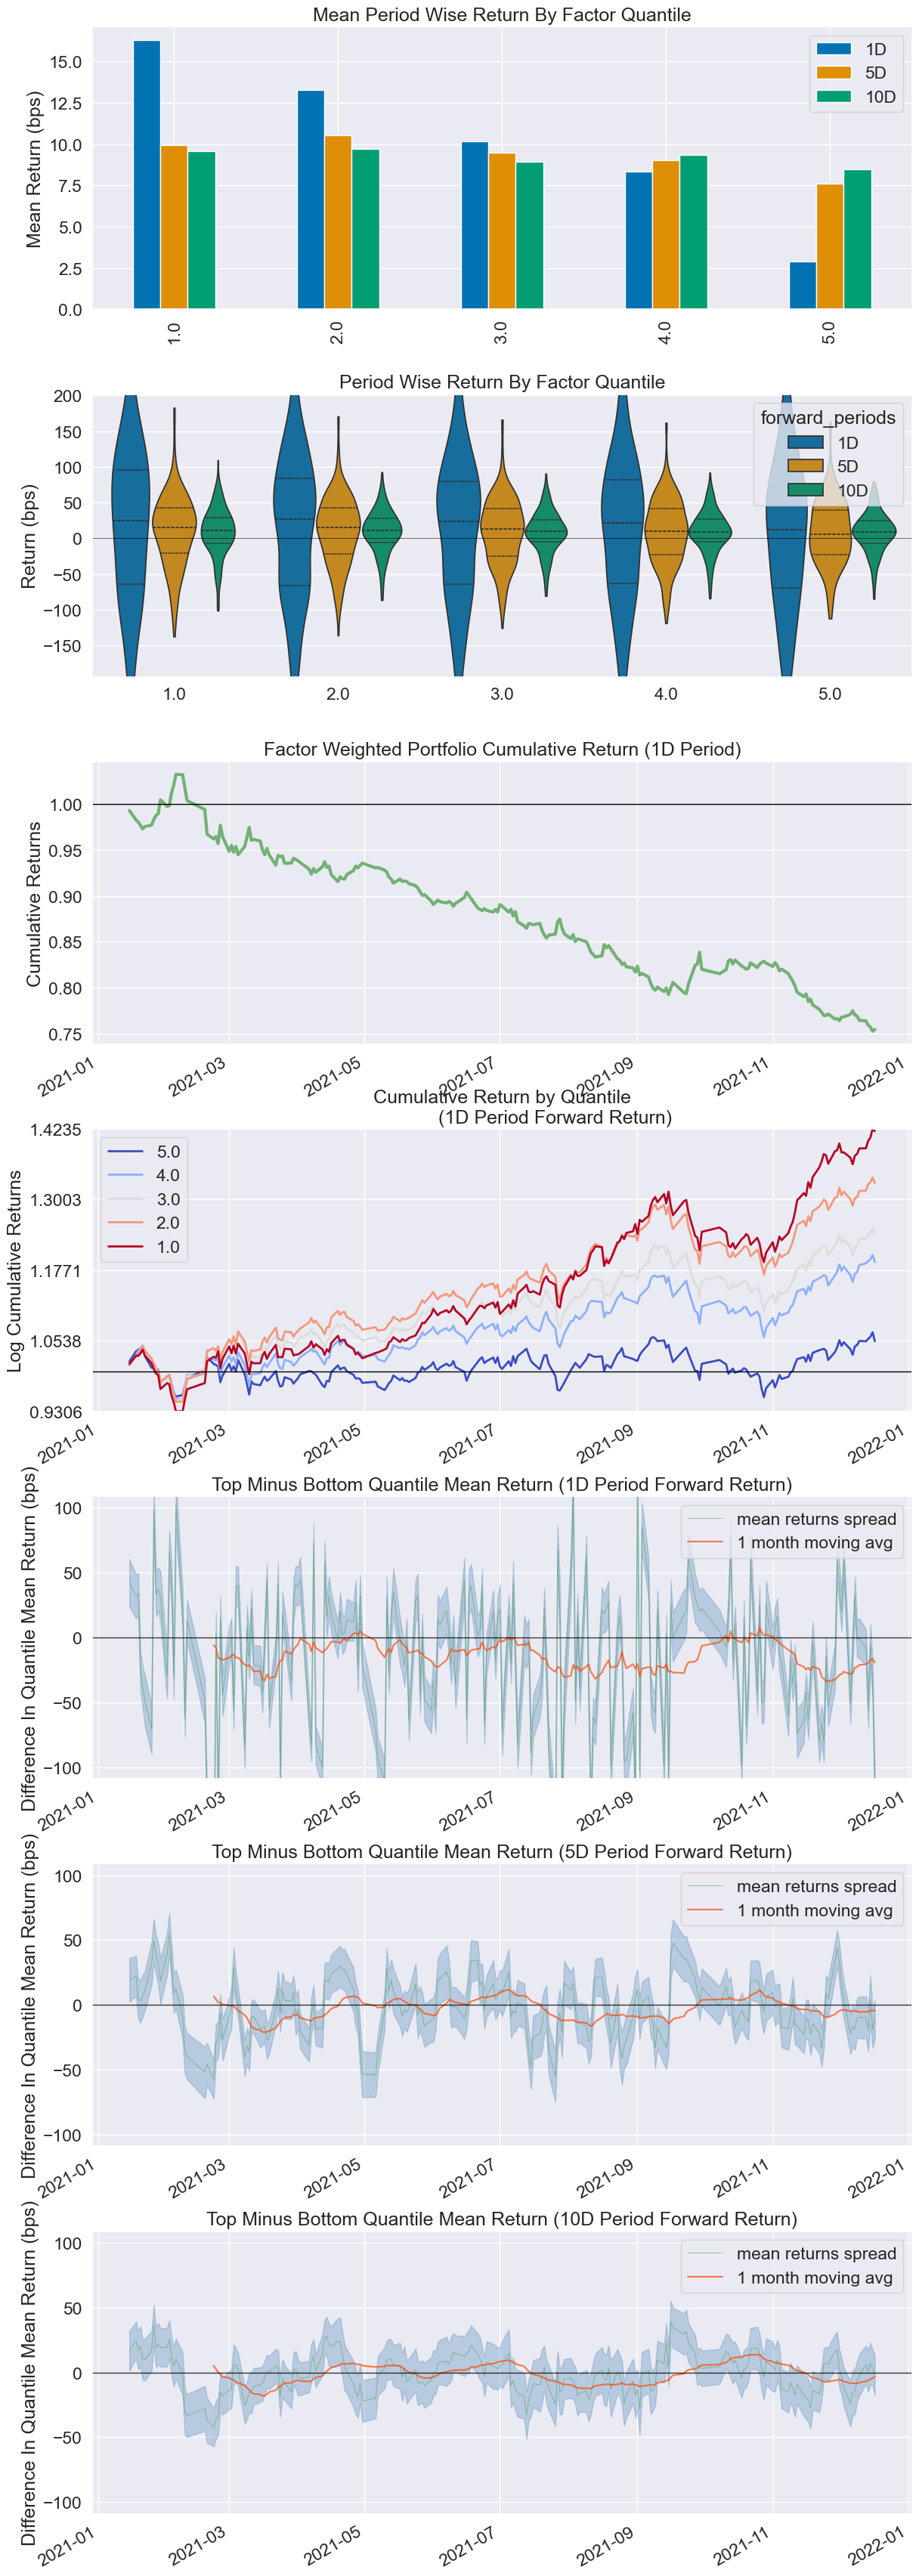

In [23]:
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=False,
                                   group_neutral=False)

## 14.获取收益序列

In [24]:
mean_quant_ret_bydate, std_quant_daily = perf.mean_return_by_quantile(
    factor_data, by_date=True, by_group=False, demeaned=False
)

In [25]:
mean_quant_rateret_bydate = mean_quant_ret_bydate.apply(
    al.utils.rate_of_return,
    axis=0,
    base_period=mean_quant_ret_bydate.columns[0],
)
mean_quant_rateret_bydate

1D        5D       10D
factor_quantile date                                    
1.0             2021-01-15  0.013605  0.007770 -0.000764
                2021-01-18  0.014251  0.001818 -0.005244
                2021-01-19 -0.000531 -0.003616 -0.005576
                2021-01-20  0.004520 -0.004836 -0.005566
                2021-01-21  0.006213 -0.007609 -0.007392
...                              ...       ...       ...
5.0             2021-12-13 -0.000558  0.001181  0.000059
                2021-12-14  0.003870 -0.000368  0.000717
                2021-12-15  0.003580  0.003456  0.000992
                2021-12-16  0.007425  0.001037  0.000203
                2021-12-17 -0.014704 -0.000688  0.000437

[1120 rows x 3 columns]

## 15.换手率分析

Turnover Analysis


,1D,5D,10D
Quantile 1.0 Mean Turnover,0.266,0.671,0.753
Quantile 2.0 Mean Turnover,0.489,0.774,0.792
Quantile 3.0 Mean Turnover,0.537,0.788,0.798
Quantile 4.0 Mean Turnover,0.500,0.770,0.793
Quantile 5.0 Mean Turnover,0.274,0.667,0.754


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.847,0.28,0.108


<Figure size 640x480 with 0 Axes>

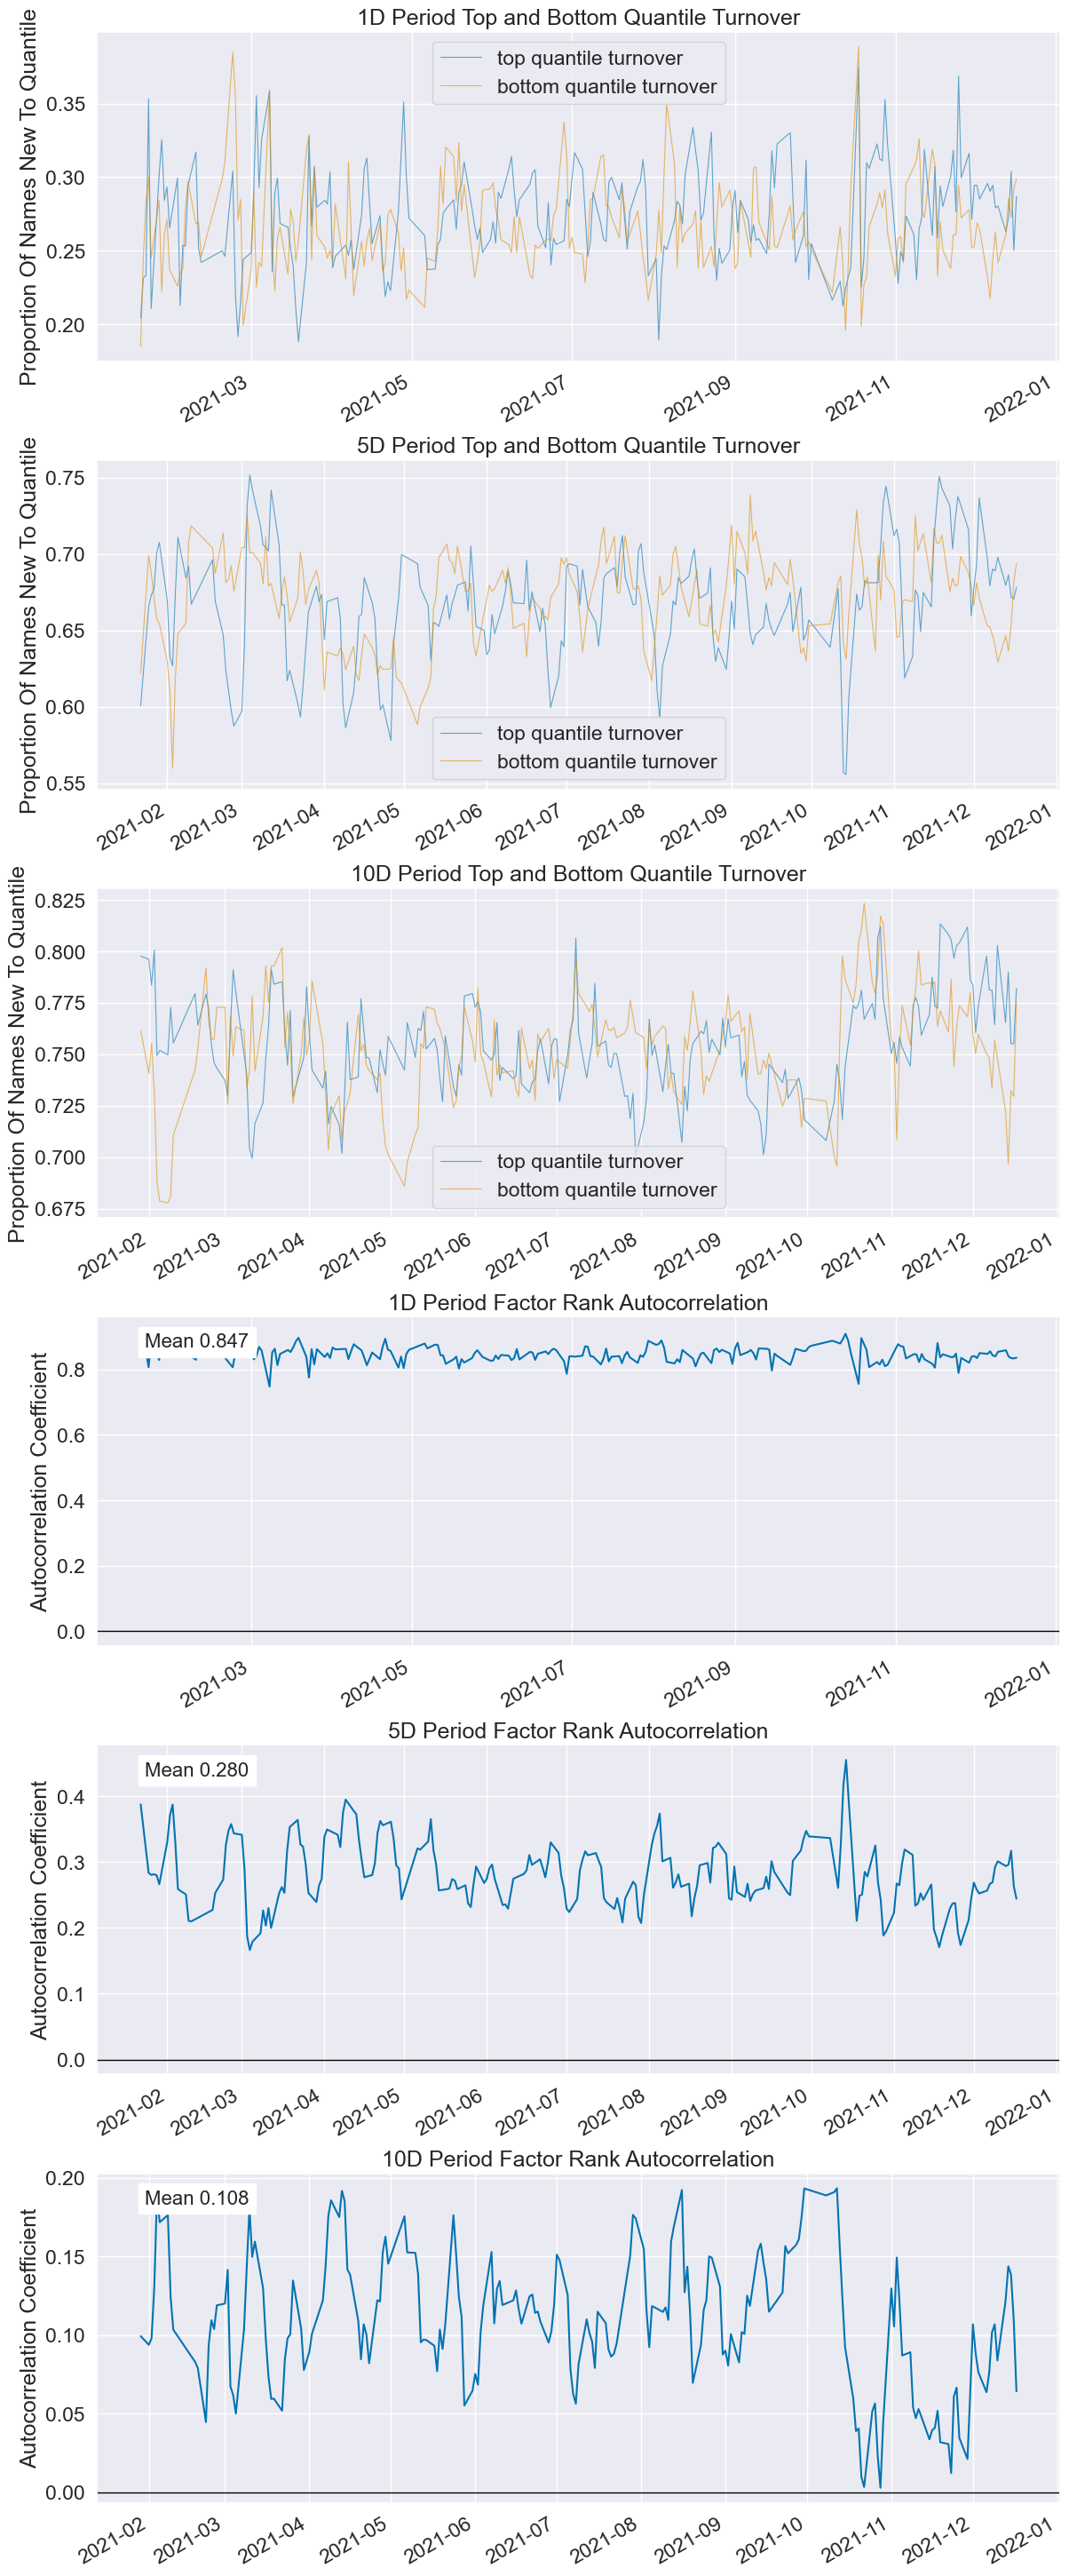

In [26]:
al.tears.create_turnover_tear_sheet(factor_data,turnover_periods=['1D','5D','10D'])